# __Analysis__

Based on the data below, the following trends are observed:
* The further from the Equator a city is, the higher the temperature.
* There is a weak correlation between latitude and humidity, however cities in northern latitudes are more likely to have lower humidity. This could simply be due to less data points from southern latitudes.
* There does not seem to be any correlation between latitude and either cloudiness or wind speeds.

In [1]:
from config import api_key
import requests
import time as t
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy as c
import random as r

date = t.strftime("%d %b %Y", t.gmtime())
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

base_url = f"{url}appid={api_key}&units={units}&q="

In [11]:
cities = []
countries = []
for i in range(2500):
    lat = r.uniform(-90, 90)
    lng = r.uniform(-180, 180)
    a = c.nearest_city(lat, lng)
    cities.append(a.city_name)
    countries.append(a.country_code)

cities_df = pd.DataFrame({"city": cities, "country": countries,
                          "latitude": "", "temp": "", "humidity": "",
                          "clouds": "", "winds": ""})

cities_df = cities_df.drop_duplicates(subset='city')
print(cities_df['city'].count())
cities_df.reset_index(drop=True, inplace=True)
cities_df.head()

878


,city,country,latitude,temp,humidity,clouds,winds
0,punta arenas,cl,,,,,
1,chokurdakh,ru,,,,,
2,petropavlovsk-kamchatskiy,ru,,,,,
3,pangai,to,,,,,
4,kulhudhuffushi,mv,,,,,


In [12]:
for i, row in cities_df.iterrows():
    query_url = f"{base_url}{row['city']},{row['country']}"
    
    print(f"Retrieving data for city {i}...{row['city']}, {row['country']}")
    
    x = t.time()

    request = requests.get(query_url).json()
    
    try:
        cities_df.loc[i, 'latitude'] = request['coord']['lat'] # latitude
        cities_df.loc[i, 'temp'] = request['main']['temp_max'] # temperature F
        cities_df.loc[i, 'humidity'] = request['main']['humidity'] # humidity %
        cities_df.loc[i, 'clouds'] = request['clouds']['all'] # cloudiness %
        cities_df.loc[i, 'winds'] = request['wind']['speed'] # wind speed kts
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        cities_df.drop(i, inplace=True)
          
    while t.time() < (x + 1):
          t.sleep(.1)
          
cities_df.reset_index(drop=True, inplace=True)

Retrieving data for city 0...punta arenas, cl
Retrieving data for city 1...chokurdakh, ru
Retrieving data for city 2...petropavlovsk-kamchatskiy, ru
Retrieving data for city 3...pangai, to
Retrieving data for city 4...kulhudhuffushi, mv
Retrieving data for city 5...illoqqortoormiut, gl
Missing field/result... skipping.
Retrieving data for city 6...saldanha, za
Retrieving data for city 7...vaini, to
Retrieving data for city 8...arraial do cabo, br
Retrieving data for city 9...luderitz, na
Retrieving data for city 10...fairbanks, us
Retrieving data for city 11...meulaboh, id
Retrieving data for city 12...tonj, sd
Missing field/result... skipping.
Retrieving data for city 13...verkhnyaya inta, ru
Retrieving data for city 14...east london, za
Retrieving data for city 15...butaritari, ki
Retrieving data for city 16...hithadhoo, mv
Retrieving data for city 17...necochea, ar
Retrieving data for city 18...puerto leguizamo, co
Retrieving data for city 19...bredasdorp, za
Retrieving data for cit

Retrieving data for city 171...hanna, ca
Retrieving data for city 172...saint-pierre, pm
Retrieving data for city 173...nguiu, au
Missing field/result... skipping.
Retrieving data for city 174...mahibadhoo, mv
Retrieving data for city 175...opuwo, na
Retrieving data for city 176...huazolotitlan, mx
Missing field/result... skipping.
Retrieving data for city 177...barbate, es
Retrieving data for city 178...touros, br
Retrieving data for city 179...qasigiannguit, gl
Retrieving data for city 180...xai-xai, mz
Retrieving data for city 181...price, us
Retrieving data for city 182...katsuura, jp
Retrieving data for city 183...kitob, uz
Retrieving data for city 184...palmer, us
Retrieving data for city 185...upernavik, gl
Retrieving data for city 186...boromo, bf
Retrieving data for city 187...ancud, cl
Retrieving data for city 188...sitka, us
Retrieving data for city 189...jambi, id
Retrieving data for city 190...komsomolskiy, ru
Retrieving data for city 191...yerbogachen, ru
Retrieving data 

Retrieving data for city 337...margate, za
Retrieving data for city 338...mount isa, au
Retrieving data for city 339...cap malheureux, mu
Retrieving data for city 340...gravelbourg, ca
Retrieving data for city 341...santa fe, cu
Retrieving data for city 342...mys shmidta, ru
Missing field/result... skipping.
Retrieving data for city 343...cumaribo, co
Missing field/result... skipping.
Retrieving data for city 344...taltal, cl
Retrieving data for city 345...usinsk, ru
Retrieving data for city 346...williston, us
Retrieving data for city 347...abeche, td
Retrieving data for city 348...myrhorod, ua
Retrieving data for city 349...coihaique, cl
Retrieving data for city 350...khorixas, na
Retrieving data for city 351...barabai, id
Retrieving data for city 352...lewisporte, ca
Retrieving data for city 353...cabo san lucas, mx
Retrieving data for city 354...baykit, ru
Retrieving data for city 355...ponta do sol, cv
Retrieving data for city 356...nizhneyansk, ru
Missing field/result... skipping

Retrieving data for city 507...myaundzha, ru
Retrieving data for city 508...sibolga, id
Retrieving data for city 509...otane, nz
Retrieving data for city 510...tripoli, ly
Retrieving data for city 511...mitsamiouli, km
Retrieving data for city 512...silver city, us
Retrieving data for city 513...diapaga, bf
Retrieving data for city 514...ruteng, id
Retrieving data for city 515...grand gaube, mu
Retrieving data for city 516...aktau, kz
Retrieving data for city 517...dudinka, ru
Retrieving data for city 518...warqla, dz
Missing field/result... skipping.
Retrieving data for city 519...dwarka, in
Retrieving data for city 520...domoni, km
Retrieving data for city 521...kamloops, ca
Retrieving data for city 522...baruun-urt, mn
Retrieving data for city 523...vanimo, pg
Retrieving data for city 524...denta, ro
Retrieving data for city 525...ulaanbaatar, mn
Retrieving data for city 526...daru, pg
Retrieving data for city 527...vangaindrano, mg
Retrieving data for city 528...dalhousie, ca
Retri

Retrieving data for city 681...nenjiang, cn
Retrieving data for city 682...namatanai, pg
Retrieving data for city 683...ugoofaaru, mv
Retrieving data for city 684...mnogovershinnyy, ru
Retrieving data for city 685...agirish, ru
Retrieving data for city 686...qiongshan, cn
Retrieving data for city 687...colac, au
Retrieving data for city 688...lazarev, ru
Retrieving data for city 689...sao gabriel da cachoeira, br
Retrieving data for city 690...carman, ca
Retrieving data for city 691...zhigansk, ru
Retrieving data for city 692...sao felix do xingu, br
Retrieving data for city 693...maiduguri, ng
Retrieving data for city 694...rawson, ar
Retrieving data for city 695...richards bay, za
Retrieving data for city 696...rio grande, br
Retrieving data for city 697...wana, pk
Retrieving data for city 698...poya, nc
Retrieving data for city 699...poronaysk, ru
Retrieving data for city 700...yaan, cn
Missing field/result... skipping.
Retrieving data for city 701...kupang, id
Retrieving data for c

Retrieving data for city 850...caluquembe, ao
Retrieving data for city 851...gdov, ru
Retrieving data for city 852...kutum, sd
Retrieving data for city 853...kota belud, my
Retrieving data for city 854...pringsewu, id
Retrieving data for city 855...valparaiso, mx
Retrieving data for city 856...olutanga, ph
Retrieving data for city 857...muli, mv
Retrieving data for city 858...gladstone, au
Retrieving data for city 859...amapa, br
Retrieving data for city 860...rassvet, ru
Retrieving data for city 861...bokaa, bw
Retrieving data for city 862...jiuquan, cn
Retrieving data for city 863...trelew, ar
Retrieving data for city 864...qinzhou, cn
Retrieving data for city 865...kumbo, cm
Retrieving data for city 866...abha, sa
Retrieving data for city 867...norheimsund, no
Retrieving data for city 868...alyangula, au
Retrieving data for city 869...nizwa, om
Retrieving data for city 870...pingzhuang, cn
Missing field/result... skipping.
Retrieving data for city 871...orsha, by
Retrieving data for

In [14]:
print(cities_df['city'].count())
cities_df.head()

765


,city,country,latitude,temp,humidity,clouds,winds
0,punta arenas,cl,-53.16,44.6,75,40,5.82
1,chokurdakh,ru,70.62,4.44,84,100,17.87
2,petropavlovsk-kamchatskiy,ru,53.05,37.4,59,75,4.47
3,pangai,to,-19.8,80.6,78,75,19.46
4,kulhudhuffushi,mv,6.62,85.64,71,100,9.01


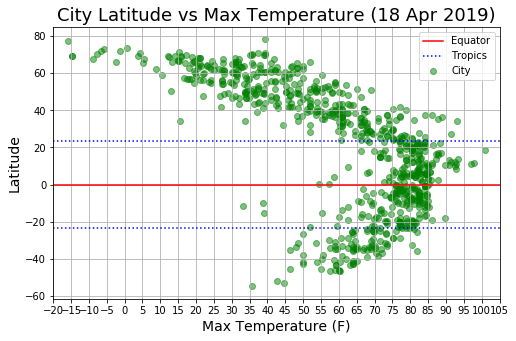

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin = int((cities_df['temp'].min() // 5) * 5)
xmax = int((cities_df['temp'].max() // 5) * 5 + 5)
xrange = range(xmin, xmax + 5, 5)

ax.scatter(cities_df['temp'], cities_df['latitude'], c='g', alpha=0.5, label='City')
ax.plot(xrange, [0] * len(xrange), 'r-', label='Equator')
ax.plot(xrange, [23.43678] * len(xrange), 'b:', label='Tropics')
ax.plot(xrange, [-23.43678] * len(xrange), 'b:')

plt.xticks(xrange)
plt.xlim(xrange[0], xrange[-1])
plt.legend()
plt.grid(True)
plt.title(f"City Latitude vs Max Temperature ({date})", fontsize=18)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Max Temperature (F)", fontsize=14)
plt.savefig(f"Output/TemperatureInWorldCities_{date}.png")
plt.show()

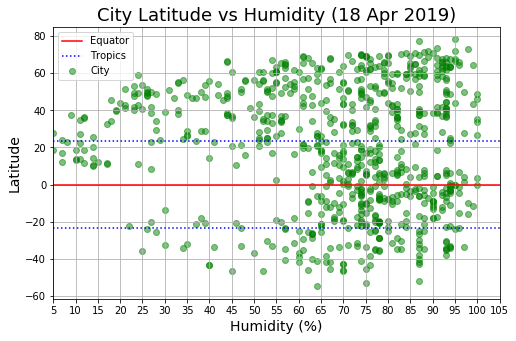

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin = int((cities_df['humidity'].min() // 5) * 5)
xmax = int((cities_df['humidity'].max() // 5) * 5 + 5)
xrange = range(xmin, xmax + 5, 5)

ax.scatter(cities_df['humidity'], cities_df['latitude'], c='g', alpha=0.5, label='City')
ax.plot(xrange, [0] * len(xrange), 'r-', label='Equator')
ax.plot(xrange, [23.43678] * len(xrange), 'b:', label='Tropics')
ax.plot(xrange, [-23.43678] * len(xrange), 'b:')

plt.xticks(xrange)
plt.xlim(xrange[0], xrange[-1])
plt.legend()
plt.grid(True)
plt.title(f"City Latitude vs Humidity ({date})", fontsize=18)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Humidity (%)", fontsize=14)
plt.savefig(f"Output/HumidityInWorldCities_{date}.png")
plt.show()

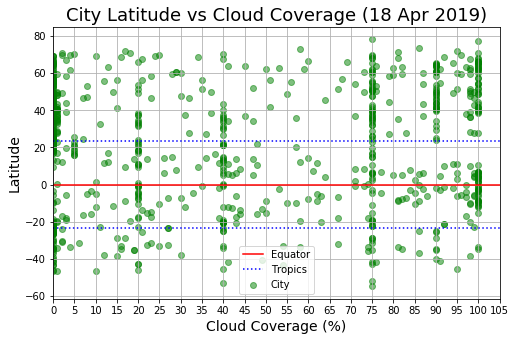

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin = int((cities_df['clouds'].min() // 5) * 5)
xmax = int((cities_df['clouds'].max() // 5) * 5 + 5)
xrange = range(xmin, xmax + 5, 5)

ax.scatter(cities_df['clouds'], cities_df['latitude'], c='g', alpha=0.5, label='City')
ax.plot(xrange, [0] * len(xrange), 'r-', label='Equator')
ax.plot(xrange, [23.43678] * len(xrange), 'b:', label='Tropics')
ax.plot(xrange, [-23.43678] * len(xrange), 'b:')

plt.xticks(xrange)
plt.xlim(xrange[0], xrange[-1])
plt.legend()
plt.grid(True)
plt.title(f"City Latitude vs Cloud Coverage ({date})", fontsize=18)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Cloud Coverage (%)", fontsize=14)
plt.savefig(f"Output/CloudsInWorldCities_{date}.png")
plt.show()

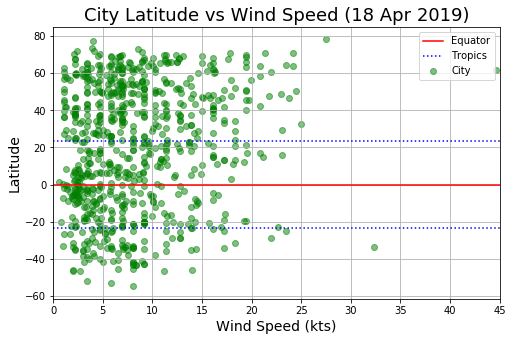

In [18]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin = int((cities_df['winds'].min() // 5) * 5)
xmax = int((cities_df['winds'].max() // 5) * 5 + 5)
xrange = range(xmin, xmax + 5, 5)

ax.scatter(cities_df['winds'], cities_df['latitude'], c='g', alpha=0.5, label='City')
ax.plot(xrange, [0] * len(xrange), 'r-', label='Equator')
ax.plot(xrange, [23.43678] * len(xrange), 'b:', label='Tropics')
ax.plot(xrange, [-23.43678] * len(xrange), 'b:')

plt.xticks(xrange)
plt.xlim(xrange[0], xrange[-1])
plt.legend()
plt.grid(True)
plt.title(f"City Latitude vs Wind Speed ({date})", fontsize=18)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Wind Speed (kts)", fontsize=14)
plt.savefig(f"Output/WindsInWorldCities_{date}.png")
plt.show()

In [19]:
cities_df.to_csv(path_or_buf='Output/Cities.csv', index=False)